# **PCA**

In [124]:
import pandas as pd                  
import numpy as np  
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

Cargamos dataset y observamos las variables

In [125]:
df = pd.read_csv('/content/performance_clean.csv')

In [126]:
df.head()

,customerid,systemloanid,loannumber,loanamount,termdays,good_bad_flag,interest,loan_interval,interest_interval
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,30,Good,4500.0,10000,mas de 3000
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,30,Good,2250.0,10000,menos de 3000
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,Other,Good,2250.0,10000,menos de 3000
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,Other,Good,1500.0,10000,menos de 3000
4,8a858970548359cc0154883481981866,301962360,9,40000.0,30,Good,4000.0,10000,mas de 3000


In [127]:
df.dtypes

customerid            object
systemloanid           int64
loannumber             int64
loanamount           float64
termdays              object
good_bad_flag         object
interest             float64
loan_interval          int64
interest_interval     object
dtype: object

In [128]:
df = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']

Vemos cuales son las variables categóricas

In [130]:
categorical_vars = set(df.columns[df.dtypes == object])
numerical_vars = set(df.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [131]:
print(categorical_vars)
print(numerical_vars)

['termdays', 'good_bad_flag', 'interest_interval']
['loanamount', 'loannumber', 'loan_interval', 'interest']


**Dummies**

In [132]:
#Generamos dummies de las variables categóricas:
dummy_int = pd.get_dummies(df[['interest_interval']], drop_first=True)
dummy_gf = pd.get_dummies(df[['good_bad_flag']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
#Añadimos las variables dummies y borramos las categóricas originales:
df = pd.concat([df, dummy_int, dummy_gf, dummy_td], axis=1)
df = df.drop(['interest_interval', 'good_bad_flag', 'termdays'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [133]:
df

,loannumber,loanamount,interest,loan_interval,interest_interval_mas de 3000,interest_interval_menos de 3000,good_bad_flag_Good,termdays_Other
0,12,30000.0,4500.0,10000,1,0,1,0
1,2,15000.0,2250.0,10000,0,1,1,0
2,7,20000.0,2250.0,10000,0,1,1,1
3,3,10000.0,1500.0,10000,0,1,1,1
4,9,40000.0,4000.0,10000,1,0,1,0
...,...,...,...,...,...,...,...,...
4277,2,10000.0,3000.0,10000,0,0,0,0
4278,2,10000.0,3000.0,10000,0,0,0,0
4279,3,10000.0,1500.0,10000,0,1,0,1
4280,2,10000.0,3000.0,10000,0,0,0,0


Estandarizamos 

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(df)

In [135]:
print(np.mean(X))
print(np.var(X))

-1.1408176806050184e-17
0.8750000000000001


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
print(np.mean(X_train))
print(np.var(X_train))

9.992712897968192e-05
0.8709485372069611


# **PCA**

In [139]:
from sklearn.decomposition import PCA

In [140]:
pca = PCA()
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)


In [141]:
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.89220126e-01 2.30584577e-01 1.41005099e-01 8.10055287e-02
 3.65091320e-02 1.48552347e-02 6.82030181e-03 2.48309672e-36]


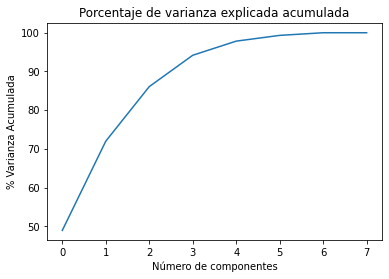

In [151]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.ylabel("% Varianza Acumulada")
plt.title('Porcentaje de varianza explicada acumulada')
plt.show()

# **Feature importance (Con PCA)**

In [150]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df.columns) + 1)],
    index=df.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
loannumber,0.725910,0.411016,3.722924e-02,4.592788e-01,2.244109e-01,1.286043e-01,-1.903843e-02,-0.000000e+00
loanamount,0.886913,0.359208,2.802889e-02,1.027033e-01,-3.819038e-02,-2.604399e-01,2.026924e-02,2.018270e-33
interest,0.855691,-0.001469,1.110690e-01,-4.545630e-01,1.662234e-01,6.554424e-02,1.104445e-01,-1.215229e-32
loan_interval,0.000000,-0.000000,3.439353e-17,-8.341931e-17,2.800142e-17,4.286771e-16,1.167907e-15,4.160024e-18
interest_interval_mas de 3000,0.902984,0.146648,5.492352e-03,-7.385324e-02,-3.772418e-01,1.153784e-01,-4.870722e-02,3.315258e-33


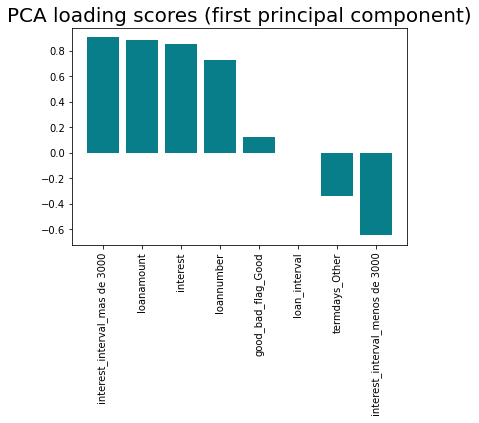

In [152]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()